In [2]:
import os
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

In [3]:
from pathlib import Path
music_path = Path("/home/keli/VideoEdit/data/musics/01 - Slow Down.mp3")
csv_path = Path("/home/keli/VideoEdit/data/csv/MissionImpossible.csv")
data_root = Path("/home/keli/VideoEdit/data/videos/")
output_root = Path("/home/keli/VideoEdit/output/videos/")

In [4]:
from src.agent.editor import load_video_features

/home/keli/miniconda3/envs/videoedit/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
load_video_features(csv_path, data_root, output_root)

In [6]:
from src.agent.retriever import video_features

In [7]:
from tqdm import tqdm

In [8]:
energy = []

for video_feature in video_features.values():
    for shot in tqdm(video_feature.shots):
        start_frame = shot['start']
        end_frame = shot['end']
        energy.append(video_feature.get_shot_features(start_frame, end_frame).energy_value)

  0%|          | 0/1364 [00:00<?, ?it/s]

100%|██████████| 3535/3535 [00:00<00:00, 25699.72it/s]


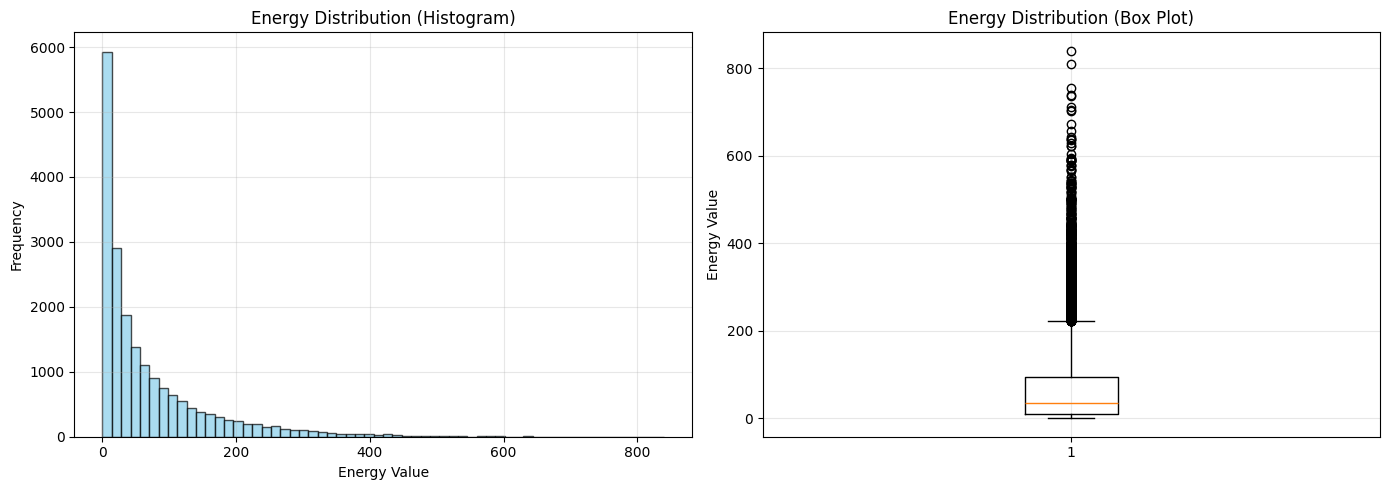

Energy Statistics:
  Mean: 70.1335
  Std: 88.4992
  Min: 0.0723
  Max: 839.7615
  Median: 34.8049
  Total shots: 19642


In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 创建分布图
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 直方图
axes[0].hist(energy, bins=60, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Energy Value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Energy Distribution (Histogram)')
axes[0].grid(True, alpha=0.3)

# 箱线图和统计信息
axes[1].boxplot(energy, vert=True)
axes[1].set_ylabel('Energy Value')
axes[1].set_title('Energy Distribution (Box Plot)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 打印统计信息
print(f"Energy Statistics:")
print(f"  Mean: {np.mean(energy):.4f}")
print(f"  Std: {np.std(energy):.4f}")
print(f"  Min: {np.min(energy):.4f}")
print(f"  Max: {np.max(energy):.4f}")
print(f"  Median: {np.median(energy):.4f}")
print(f"  Total shots: {len(energy)}")

2025-12-14 14:01:20.252 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=1.6e-05)


{'lognorm': {'s': np.float64(1.412785125719083), 'loc': -0.2589636609384144, 'scale': np.float64(31.357552806443593)}}


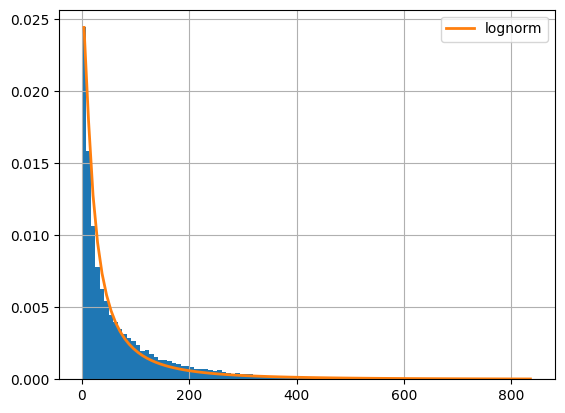

In [11]:
from fitter import Fitter
import matplotlib.pyplot as plt

# 假设 y 是你的数据数组
y = energy

# 实例化 Fitter，传入数据
# distributions 参数可以指定你想尝试的分布，不填则默认尝试最常见的几种
f = Fitter(y, distributions=['lognorm'])

# 开始拟合
f.fit(n_jobs=1)

# 打印最好的分布及其参数
print(f.get_best(method = 'sumsquare_error'))

# 绘制拟合结果对比图
f.summary()
plt.show()